## *Bonus Content*: Neural Nets
The new hotness.

In [1]:
# neural nets use a different library ecosystem
import keras
import keras.layers as kl

Using TensorFlow backend.


In [2]:
# MNIST is the "generic toy dataset" of choice for deep learning experiments
from keras.datasets import mnist
(X_tr, y_tr), (X_v, y_v) = mnist.load_data()

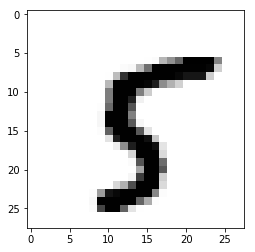

In [31]:
# Let's see what this data looks like:
import matplotlib.pyplot as plt
import numpy.random as npr
plt.imshow(X_tr[npr.randint(X_tr.shape[0])], cmap="Greys");

In [5]:
# do one-hot encoding. Take labels of the form 1, 3, 6 into index-encoded
# arrays like [0, 1, 0...]. [0, 0, 0, 1, 0...], etc.
from keras.utils import to_categorical
Y_tr = to_categorical(y_tr)
Y_v = to_categorical(y_v)

# otherwise normalization would do integer rounding: we don't want that!
X_tr = X_tr.astype(np.float64)
X_v = X_v.astype(np.float64)

Neural nets work best with normalized data.

Normalization subtracts the mean and divides by the standard deviation.
It's often applied "featurewise", i.e. each pixel is normalized relative to the
pixels in the same locaiton across images

In MNIST, because some pixels are almost always 0, normalizing them would lead to value blowup. We normalize by the global average instead.

**Exercise**: how should normalization happen with the separate training and validation sets?

In [6]:
M = X_tr.mean()
S = X_tr.std()
    
X_tr -= M
X_tr /= S
X_v -= M
X_v /= S

# the first dimension is the number of samples
print(X_tr.shape)

(60000, 28, 28)


In [7]:
# our first model will be a basic Fully Connected neural net
m = keras.Sequential()
m.add(kl.Flatten())
m.add(kl.Dense(32, activation='relu'))
m.add(kl.Dense(32, activation='relu'))
# "softmax" is a nonlinarity that scales its vector input so that it sums to 1
# thus allowing for (mathematically iffy, but practical) interpretation as a vector of probabilities
m.add(kl.Dense(Y_tr.shape[1], activation='softmax'))

**Exercise**: why do we need the Flatten() call?

In [ ]:
# deep learning models are very computationally intensive, and need to be compiled
# and optimized for good performance
print("Compiling model...")
m.compile(optimizer='adadelta', loss='categorical_crossentropy', metrics=['categorical_accuracy'])
print("Fitting model...")
m.fit(X_tr, Y_tr, epochs=5, batch_size=128, validation_data=(X_v, Y_v));

**Exercise**: think about why convolutional neural nets are a better fit for natural images. What properties of physical relaity do they exploit better?

## Coding Exercise
- implement a convolutional neural network
- competition! See who can get the highest validation accuracy.
- **Exercise**: what's wrong with the line above, from a scientific standpoint. What happens when many differnet models are tried on the same small dataset?

In [ ]:
# Implement your advanced AI here